In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import seaborn as sns
from scipy.stats import norm, skew

In [50]:
df_train_x = pd.read_csv('training_dataset.csv', sep=';')
df_train_y = pd.read_csv('training_solution.csv', sep=';', header=None)
df_test_x = pd.read_csv('test_dataset.csv', sep=';')

In [51]:
df_train_x.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,2839.1794,81.08016,49.9,5.5845,1000.0031,11915.304335,514.1744,4.0372,450.3108,5.0363,1545.5596,141.487908,12.0210,2.08430,469.2
1,2834.6511,81.04068,49.9,5.5799,1000.0001,11936.483827,514.4932,4.0283,439.8173,5.0496,1465.1443,147.431487,11.9936,2.08430,470.1
2,2825.8794,81.10788,50.0,5.5701,1000.0043,11986.657873,515.6882,4.0033,418.8473,5.0780,1369.8466,154.359956,11.9541,2.08145,471.3
3,2834.0408,81.15156,50.1,5.5600,1000.0027,12008.274194,516.7896,3.9800,420.2397,5.0915,1380.0095,159.031818,11.9268,2.07575,472.6
4,2826.1892,81.07470,50.1,5.5600,1000.0035,12012.326337,516.9270,3.9781,424.1410,5.0899,1345.6157,160.725765,11.9304,2.07670,473.5


In [52]:
df_train_y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df_train_y.columns = df_train_x.columns

In [54]:
df_train_y.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df_train_y[df_train_y==1].stack().reset_index()

In [61]:
y = y.drop(['level_0', 0], axis=1)
y = y.rename(columns = {'level_1':'labels'})

In [62]:
y.head()

,labels
0,x2
1,x2
2,x2
3,x2
4,x2


In [63]:
df_train_x['label'] = y.labels
df = df_train_x
df_train_x.drop(['label'], axis=1)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,label
0,2839.1794,81.08016,49.9,5.5845,1000.0031,11915.304335,514.1744,4.0372,450.3108,5.0363,1545.5596,141.487908,12.0210,2.08430,469.2,x2
1,2834.6511,81.04068,49.9,5.5799,1000.0001,11936.483827,514.4932,4.0283,439.8173,5.0496,1465.1443,147.431487,11.9936,2.08430,470.1,x2
2,2825.8794,81.10788,50.0,5.5701,1000.0043,11986.657873,515.6882,4.0033,418.8473,5.0780,1369.8466,154.359956,11.9541,2.08145,471.3,x2
3,2834.0408,81.15156,50.1,5.5600,1000.0027,12008.274194,516.7896,3.9800,420.2397,5.0915,1380.0095,159.031818,11.9268,2.07575,472.6,x2
4,2826.1892,81.07470,50.1,5.5600,1000.0035,12012.326337,516.9270,3.9781,424.1410,5.0899,1345.6157,160.725765,11.9304,2.07670,473.5,x2


In [64]:
df_x = df.iloc[:,:-1]
df_y = df.iloc[:,-1]

In [65]:
set(df_y)

{nan, 'x2', 'x3'}

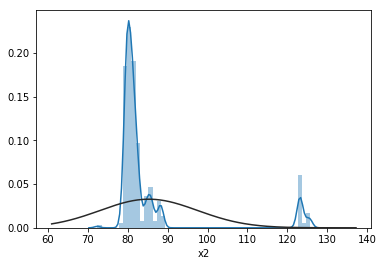

In [72]:
sns.distplot(df['x2'],fit=norm)

In [73]:
df['x2'] = np.log1p(df['x2'])

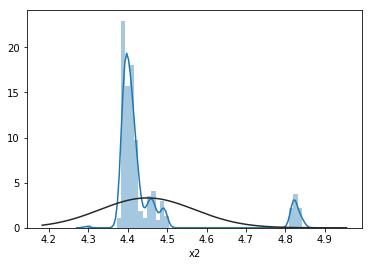

In [74]:
sns.distplot(df['x2'],fit=norm)

In [5]:
loo = LeaveOneOut()

### Decision Tree With Cross Validation

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state = 0) 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

train = DecisionTreeClassifier()
parameters = {'max_depth': np.arange(3, 10)}
clf = GridSearchCV(train, parameters, cv=loo)
dtree_model = clf.fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

cm = confusion_matrix(y_test, dtree_predictions) 
cm

array([[70,  0,  1],
       [ 0,  8,  0],
       [ 0,  0,  6]], dtype=int64)

In [27]:
accuracy_score(dtree_predictions, y_test)

0.9882352941176471

### RandomForest

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state = 0) 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=1000, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

cm = confusion_matrix(y_test, y_pred) 
cm

array([[71,  0,  0],
       [ 0,  8,  0],
       [ 1,  0,  5]], dtype=int64)

In [29]:
accuracy_score(y_pred, y_test)

0.9882352941176471

### SVM for Multi Classification

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state = 0) 

from sklearn.svm import SVC 
svm_model_linear = SVC(gamma='scale', decision_function_shape='ovo').fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[71,  0,  0],
       [ 8,  0,  0],
       [ 6,  0,  0]], dtype=int64)

In [31]:
accuracy_score(svm_predictions, y_test)

0.8352941176470589

### KNN Classifier 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state = 0) 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
cm

array([[69,  0,  2],
       [ 1,  7,  0],
       [ 2,  0,  4]], dtype=int64)

In [33]:
accuracy_score(knn_predictions, y_test)

0.9411764705882353

### Naive Bayes Classifier 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state = 0) 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
cm = confusion_matrix(y_test, gnb_predictions)
cm

0.9647058823529412


array([[69,  0,  2],
       [ 0,  8,  0],
       [ 1,  0,  5]], dtype=int64)

In [35]:
accuracy_score(gnb_predictions, y_test)

0.9647058823529412